In [2]:
import pandas as pd


train_set = pd.read_csv("C:/Users/Aaron/Desktop/Kaggle/Competiciones/titanic/train.csv")
train_set.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


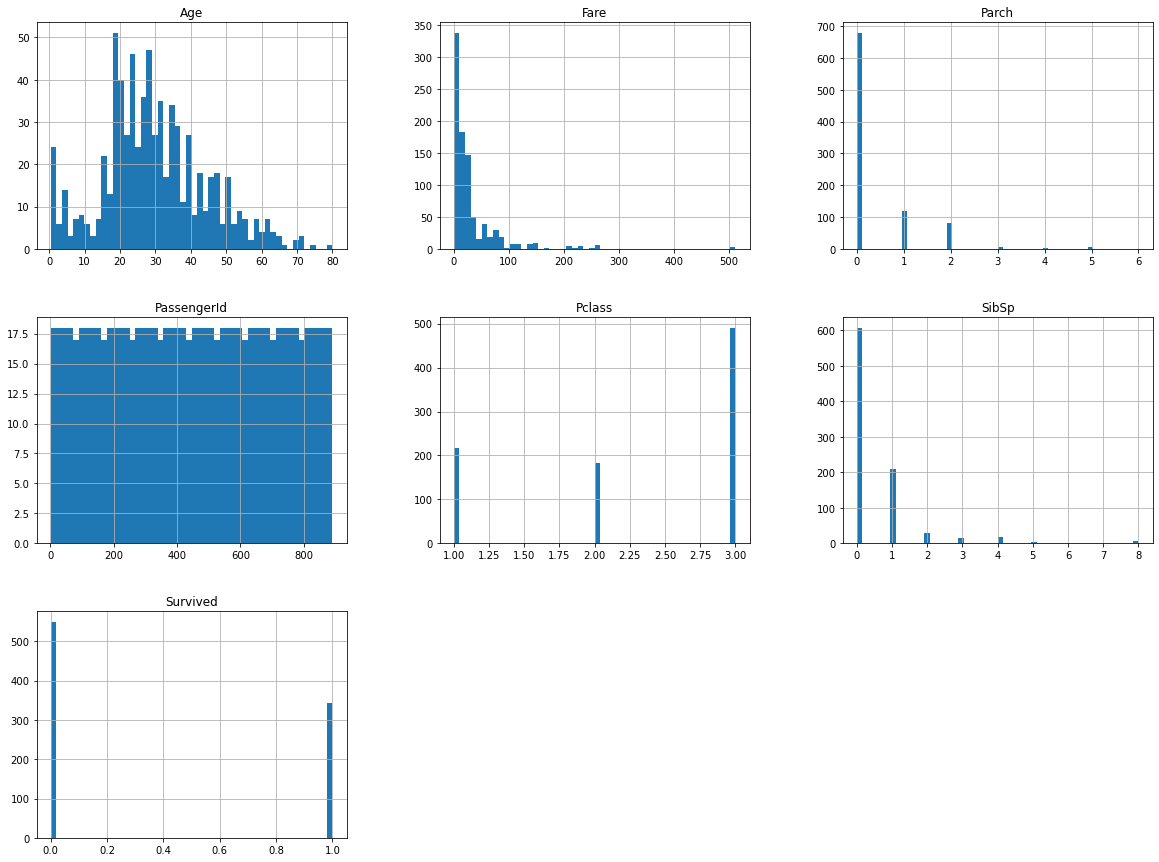

In [8]:
import matplotlib.pyplot as plt
train_set.hist(bins=50,figsize=(20,15))
plt.show()

In [48]:
train_set[train_set.Fare==0].count() #15 passengers with 0 Fare

PassengerId    15
Survived       15
Pclass         15
Name           15
Sex            15
Age             7
SibSp          15
Parch          15
Ticket         15
Fare           15
Cabin           3
Embarked       15
dtype: int64

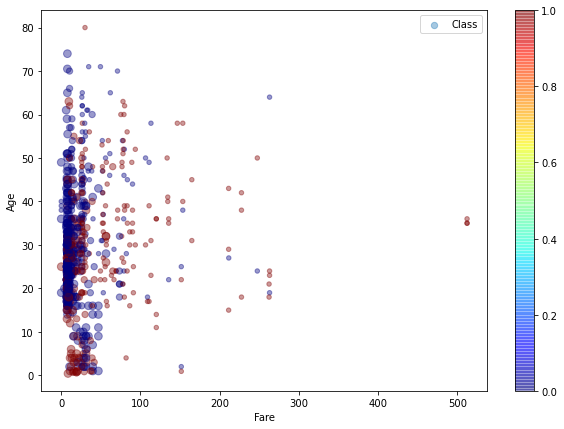

In [68]:
train_set.plot(kind="scatter", x="Fare", y="Age", alpha=0.4, figsize=(10,7), c=train_set.Survived, 
               s=train_set.Pclass*20, label="Class",
               cmap=plt.get_cmap("jet"),colorbar=True, sharex=False) 
#People who didn't survived likely to be on 1st or 2nd class
#Also the fare is closely related to the Class
#Age actually doesn't matter too much

In [71]:
corr_matrix = train_set.corr()
corr_matrix["Fare"].sort_values(ascending=False)
#Strong Negative correlation between Fare and Pclass, as seen before

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [72]:
corr_matrix = train_set.corr()
corr_matrix["Survived"].sort_values(ascending=False)
#People who survived actually had class 1 and the Fare was high

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002486DFADA00>,
      dtype=object)

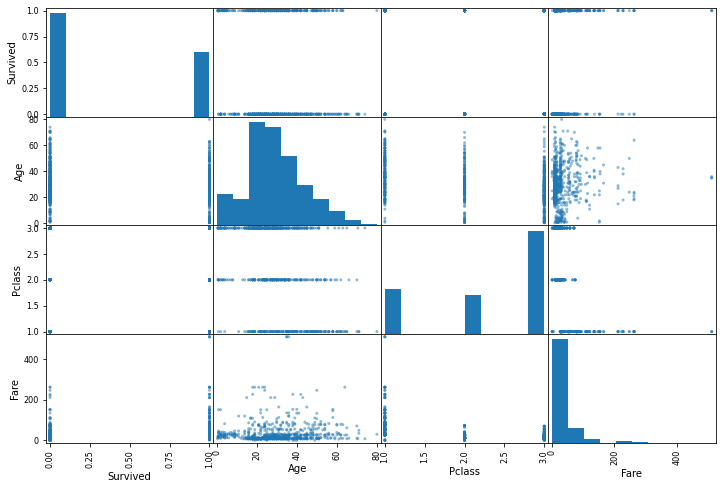

In [74]:
from pandas.plotting import scatter_matrix

attributes = ["Survived","Age","Sex","Pclass","Fare"]
scatter_matrix(train_set[attributes],figsize=(12,8))

In [75]:
train_set.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [186]:
#Data Cleaning

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder



clean_set = train_set.copy()
clean_set = clean_set.drop("PassengerId" , axis=1) #Dropping whole attribute since is autonumerical index
clean_set = clean_set.drop("Name", axis=1) #Dropping whole attribute since has no relation with survival - common sense
clean_set = clean_set.drop("Cabin", axis=1) #Dropping whole attribute since 80% of data is NaN
clean_set = clean_set.dropna(subset=["Embarked"]) #Dropping 2 rows with NaN on embarked feature
clean_set = clean_set.drop("Ticket", axis=1) #Related info to Pclass,Embarked and Fare so is redundant

labels_set = clean_set["Survived"].copy() 
clean_set=clean_set.drop("Survived", axis=1) #Dropping prediction values

#Encoding Sex and Embarked attributes
encoder = OrdinalEncoder()
clean_set_ordinal = clean_set[["Sex"]]
clean_set_ordinal_encoded = encoder.fit_transform(clean_set_ordinal)
clean_set["Sex"] = clean_set_ordinal_encoded

embarked_encoder = OrdinalEncoder()
clean_set_ordinal = clean_set[["Embarked"]]
clean_set_ordinal_encoded = encoder.fit_transform(clean_set_ordinal)
clean_set["Embarked"] = clean_set_ordinal_encoded

clean_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.0,1,0,7.2500,2.0
1,1,0.0,38.0,1,0,71.2833,0.0
2,3,0.0,26.0,0,0,7.9250,2.0
3,1,0.0,35.0,1,0,53.1000,2.0
4,3,1.0,35.0,0,0,8.0500,2.0


In [180]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


#Replacing NaN values with median, and standarize all data
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler())
])

std_set = num_pipeline.fit_transform(clean_set)
std_set

array([[ 0.82520863,  0.73534203, -0.56367407, ..., -0.47432585,
        -0.50023975,  0.58683958],
       [-1.57221121, -1.35991138,  0.66921696, ..., -0.47432585,
         0.78894661, -1.93955453],
       [ 0.82520863, -1.35991138, -0.25545131, ..., -0.47432585,
        -0.48664993,  0.58683958],
       ...,
       [ 0.82520863, -1.35991138, -0.10133993, ...,  2.00611934,
        -0.17408416,  0.58683958],
       [-1.57221121,  0.73534203, -0.25545131, ..., -0.47432585,
        -0.0422126 , -1.93955453],
       [ 0.82520863,  0.73534203,  0.20688282, ..., -0.47432585,
        -0.49017322, -0.67635748]])

In [224]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(std_set, labels_set)

DecisionTreeClassifier(max_depth=5)

In [218]:
some_data = std_set[:10];
some_labels = labels_set[:10];
print("Predictions: ", clf.predict(some_data))
print("Labels: ", list(some_labels))

Predictions:  [0 1 1 1 0 0 0 0 1 1]
Labels:  [0, 1, 1, 1, 0, 0, 0, 0, 1, 1]


In [225]:
import numpy as np
predictions = clf.predict(std_set)
labels_numpy = labels_set.to_numpy()
np.sum(predictions == labels_numpy)/labels_numpy.size

0.8413948256467941

In [115]:
train_set.loc[train_set["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [149]:
train_set[train_set["Pclass"] == 1].groupby(["Cabin"]).Cabin.unique()

Cabin
A10    [A10]
A14    [A14]
A16    [A16]
A19    [A19]
A20    [A20]
       ...  
E63    [E63]
E67    [E67]
E68    [E68]
E8      [E8]
T        [T]
Name: Cabin, Length: 133, dtype: object

In [150]:
train_set[train_set["Pclass"] == 2].groupby(["Cabin"]).Cabin.unique()

Cabin
D          [D]
D56      [D56]
E101    [E101]
E77      [E77]
F2        [F2]
F33      [F33]
F4        [F4]
Name: Cabin, dtype: object

In [151]:
train_set[train_set["Pclass"] == 3].groupby(["Cabin"]).Cabin.unique()

Cabin
E10        [E10]
E121      [E121]
F E69    [F E69]
F G63    [F G63]
F G73    [F G73]
F38        [F38]
G6          [G6]
Name: Cabin, dtype: object

In [152]:
encoder = OrdinalEncoder()
clean_set_ordinal = clean_set[["Cabin"]]
clean_set_ordinal_encoded = encoder.fit_transform(clean_set_ordinal)
clean_set["Cabin"] = clean_set_ordinal_encoded
clean_set.head()

ValueError: Input contains NaN